In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.metrics import ConfusionMatrixDisplay



In [2]:
# Display setting to better visualize notebook
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',10)
pd.set_option('display.width',1000)

In [3]:
# Read Aggregated  data
df = pd.read_csv('New_features.csv')

In [4]:
df.shape

(5410, 13)

In [5]:
df.columns

Index(['Provider', 'IP_average_claim_duration', 'OP_average_claim_duration', 'PotentialFraud', 'IP_Claims_Total', 'OP_Claims_Total', 'IP_Averagedaysinhospital', 'IPAnnualDeductibleAmt', 'OPAnnualDeductibleAmt', 'IP_total_diagnosis', 'OP_total_diagnosis', 'IP_total_procedures', 'OP_total_procedures'], dtype='object')

In [6]:
df.head()

,Provider,IP_average_claim_duration,OP_average_claim_duration,PotentialFraud,IP_Claims_Total,OP_Claims_Total,IP_Averagedaysinhospital,IPAnnualDeductibleAmt,OPAnnualDeductibleAmt,IP_total_diagnosis,OP_total_diagnosis,IP_total_procedures,OP_total_procedures
0,PRV51001,5.0,1.0,No,97000.0,7640.0,5.0,890.0,475.0,36.0,44.0,3.0,0.0
1,PRV51003,5.0,2.0,Yes,573000.0,32670.0,5.0,823.0,665.0,503.0,190.0,48.0,0.0
2,PRV51004,0.0,1.0,No,0.0,52170.0,0.0,454.0,601.0,0.0,385.0,0.0,0.0
3,PRV51005,0.0,1.0,Yes,0.0,280910.0,0.0,399.0,476.0,0.0,3016.0,0.0,0.0
4,PRV51007,5.0,1.0,No,19000.0,14710.0,5.0,424.0,431.0,22.0,193.0,1.0,0.0


In [7]:
X=df.drop(columns=['Provider','PotentialFraud'])

In [8]:
X.shape

(5410, 11)

In [9]:
y=df['PotentialFraud'].map({'Yes': 1, 'No': 0}) 

In [10]:
y

0       0
1       1
2       0
3       1
4       0
       ..
5405    0
5406    0
5407    0
5408    0
5409    0
Name: PotentialFraud, Length: 5410, dtype: int64

In [42]:
# comparison with and without tuning


Decision Tree (Baseline)
Accuracy: 0.9418
Precision: 0.7794
Recall: 0.5248
F1-score: 0.6272
ROC-AUC: 0.9042
Confusion Matrix:
[[966  15]
 [ 48  53]]

Decision Tree (After Hyperparameter Tuning)
Accuracy: 0.9418
Precision: 0.8393
Recall: 0.4653
F1-score: 0.5987
ROC-AUC: 0.9564
Confusion Matrix:
[[972   9]
 [ 54  47]]


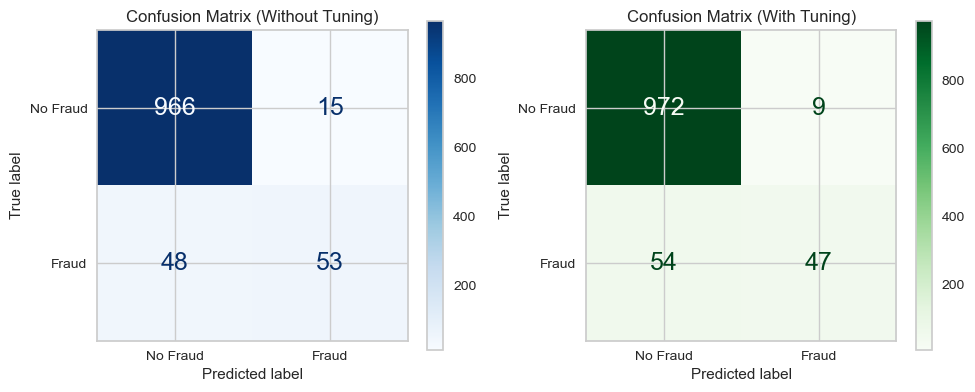

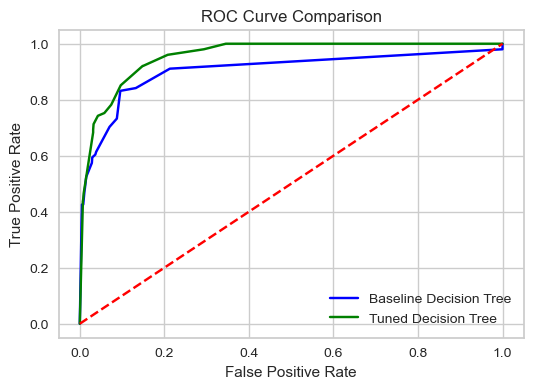

In [47]:
# Decision Tree
#Define features and target variable
X = df.drop(columns=['Provider', 'PotentialFraud'])
y = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

### **1. Train Decision Tree without Hyperparameter Tuning**
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Compute evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

### **2. Train Decision Tree with Hyperparameter Tuning using GridSearchCV**
param_grid = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model after tuning
best_dt_model = grid_search.best_estimator_

# Predictions
y_pred_best = best_dt_model.predict(X_test)
y_prob_best = best_dt_model.predict_proba(X_test)[:, 1]

# Compute evaluation metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_prob_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

### **3. Compare Results**
print("\nDecision Tree (Baseline)")
print(f'Accuracy: {accuracy_dt:.4f}')
print(f'Precision: {precision_dt:.4f}')
print(f'Recall: {recall_dt:.4f}')
print(f'F1-score: {f1_dt:.4f}')
print(f'ROC-AUC: {roc_auc_dt:.4f}')
print(f'Confusion Matrix:\n{conf_matrix_dt}')

print("\nDecision Tree (After Hyperparameter Tuning)")
print(f'Accuracy: {accuracy_best:.4f}')
print(f'Precision: {precision_best:.4f}')
print(f'Recall: {recall_best:.4f}')
print(f'F1-score: {f1_best:.4f}')
print(f'ROC-AUC: {roc_auc_best:.4f}')
print(f'Confusion Matrix:\n{conf_matrix_best}')

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

# Define figure size (smaller than before)
fig, axes = plt.subplots(1, 2, figsize=(10,4))

# Function to plot confusion matrix with larger text labels
def plot_conf_matrix(ax, conf_matrix, title, cmap):
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Fraud', 'Fraud'])
    disp.plot(cmap=cmap, ax=ax, values_format='d')  # 'd' ensures integer display
    ax.set_title(title, fontsize=12)

    # Increase font size of numbers inside matrix
    for text in ax.texts:
        text.set_fontsize(18)

# Plot confusion matrices
plot_conf_matrix(axes[0], conf_matrix_dt, 'Confusion Matrix (Without Tuning)', 'Blues')
plot_conf_matrix(axes[1], conf_matrix_best, 'Confusion Matrix (With Tuning)', 'Greens')

plt.tight_layout()
plt.show()

### **5. ROC Curve Comparison**
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_best, tpr_best, _ = roc_curve(y_test, y_prob_best)

plt.figure(figsize=(6, 4))
plt.plot(fpr_dt, tpr_dt, label='Baseline Decision Tree', color='blue')
plt.plot(fpr_best, tpr_best, label='Tuned Decision Tree', color='green')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()